# Ejercico 1-1  Prueba de bondad de ajuste

## Enunciado

Los tiempos de servicio de un banco de la ciudad de Rosario se registraron en la siguiente tabla. Se desea determinar si los mismos corresponden a una distribución exponencial con parámetro β=10 y un nivel de significancia α = 10%.

| 3  | 15 | 45 | 3 | 8  | 11 | 2 | 23 | 21 | 5  |
|----|----|----|---|----|----|---|----|----|----|
| 13 |  2 |  1 | 5 | 16 | 9  | 3 | 16 | 10 | 13 | 


## Declaraciones de variables y bibliotecas

### Bibliotecas necesarias

In [53]:
from scipy.stats import expon, chi2
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

### Declaraciones de Variables

In [54]:
muestra = [  3, 15, 45, 3, 8, 11, 2, 23, 21, 5, 
            13, 2, 1, 5, 16, 9, 3, 16, 10, 13]
beta= 10
n = len(muestra)
k = int(n ** 0.5)
alfaChi2 = 0.1
  
rango  = max(muestra) - min(muestra)
amplitud = int(rango / k)

# generar los intervalos para el histograma
bins_range = range(min(muestra), max(muestra) + amplitud, amplitud)


## Representación Gráfica

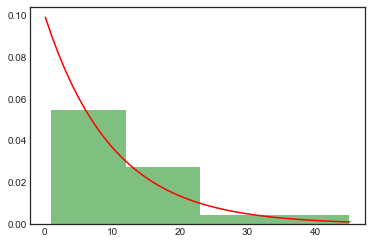

In [55]:
x = np.arange(expon.ppf(0.01, scale=beta),
              expon.ppf(0.99, scale=beta))
curva_exponencial = expon.pdf(x, scale=beta)
plt.style.use('seaborn-white')
plt.plot(x, curva_exponencial, 'r-')
plt.hist(muestra, density=1, bins=bins_range, color='g', alpha=0.5)
plt.show()

## Cálculos

In [56]:

clases = np.histogram(muestra,bins=bins_range)
# clases es un array con dos elementos:
# clases[0] = frecuencias observadas
# clases[1] = limite inferior de cada intervalo
valores_observados = clases[0]
limites_superiores = clases[1][1:]
tabla_histograma = list(zip(limites_superiores,valores_observados))
print(tabulate(tabla_histograma, ['Limite Superior', 'Frecuencia Observadas'], tablefmt="github"))


|   Limite Superior |   Frecuencia Observadas |
|-------------------|-------------------------|
|                12 |                      12 |
|                23 |                       6 |
|                34 |                       1 |
|                45 |                       1 |


In [57]:
prob_intervalos = []
prob_acumulada = 0

for(i) in range(clases[1].size):
    prob = expon.cdf(clases[1][i], scale=beta)
    # para el primer intervalo calculo directamente la probabilidad acumulada
    if i == 0:
        print('P(X < ', clases[1][i], ') = ', prob)
    # en los siguientes tengo que restar la acumulada hasta el intervalo anterior 
    else:
        prob -= expon.cdf(clases[1][i-1], scale=beta)
        print('P(',clases[1][i-1] ,'< X < ', clases[1][i], ') = ', prob)
        prob_intervalos.append(prob)
    prob_acumulada += prob

# finalmente la probabilidad acumulada desde el ultimo intevalo hasta el infinito
prob = 1 - expon.cdf(clases[1][clases[1].size-1], scale=beta)
print('P(X > ', clases[1][clases[1].size-1], ') = ', prob)

prob_acumulada += prob
print("Acumulado Total = {m}".format(m=prob_acumulada))

valores_esperados = []
for(i) in prob_intervalos:
    valores_esperados.append(i*n)


P(X <  1 ) =  0.09516258196404044
P( 1 < X <  12 ) =  0.6036432061237573
P( 12 < X <  23 ) =  0.2009353681893984
P( 23 < X <  34 ) =  0.06688557376247772
P( 34 < X <  45 ) =  0.022264273422083813
P(X >  45 ) =  0.011108996538242266
Acumulado Total = 1.0


In [58]:
tableData = list(zip(limites_superiores, valores_observados, prob_intervalos, valores_esperados))
print(tabulate(tableData, ['Limites', 'Valores', 'Prob', 'Esperado'], tablefmt="github"))

|   Limites |   Valores |      Prob |   Esperado |
|-----------|-----------|-----------|------------|
|        12 |        12 | 0.603643  |  12.0729   |
|        23 |         6 | 0.200935  |   4.01871  |
|        34 |         1 | 0.0668856 |   1.33771  |
|        45 |         1 | 0.0222643 |   0.445285 |


In [59]:
chiDePrueba = 0
for(i) in range(len(valores_esperados)):
    chiDePrueba += ((valores_esperados[i] - valores_observados[i])**2)/valores_esperados[i]

print("Chi de Prueba = {m}".format(m=chiDePrueba))

Chi de Prueba = 1.7535441524989246


In [60]:
chi2Critico = chi2.ppf(1-alfaChi2, len(valores_esperados)-1)

print("Chi2 Critico = {m}".format(m=chi2Critico))

Chi2 Critico = 6.251388631170325


## Conclusión

In [61]:
if chiDePrueba > chi2Critico:
    print("Se rechaza la hipotesis nula")
else:
    print("No se puede rechazar la hipotesis nula")

No se puede rechazar la hipotesis nula
